# FINAL TASK PROJECT BASED INTERNSHIP IDX PARTNERS DS:<br>BUILD A PREDICTION MODEL TO PREDICT THE CLIENT CREDIT WORTHINESS

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Load Data & Premilinary Data Analysis

In [42]:
# Read the CSV file into a DataFrame(dfloan)
dfloan = pd.read_csv('../data/loan_data_2007_2014.csv', low_memory=False)

# Select th ecolumns of dfoan that have object dtype and store them in categoric
categoric = dfloan.select_dtypes('object')

# Seelct the columns of dfloan that have number dtype and store them in numeric
numeric = dfloan.select_dtypes('number')

# Assign the number of rows and columns to rows and cols variables
rows = dfloan.shape[0]
cols = dfloan.shape[1]

# Print the shape of dfloan
print(f'dfloan Rows: {rows}\ndfloan Columns: {cols}')

# Print sample of 6 rows from dfloan
print('\nData sample showcase:')
display(dfloan.sample(6))

# Print statistical summary of the cateogircal data in dfloan
print('\nCategorical data statistical summary:')
display(categoric.describe())

# Print statistical summary of the numerical data in dfloan
print('\nNumerical data statistical summary:')
display(numeric.describe())

dfloan Rows: 466285
dfloan Columns: 75

Data sample showcase:


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
369799,369799,18586217,20748811,10000,10000,10000.0,36 months,16.99,356.48,D,D3,Warehouse,< 1 year,RENT,40000.0,Verified,Jun-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,191xx,PA,5.97,0.0,Nov-07,3.0,NaN,85.0,8.0,1.0,4944,37.7,9.0,w,5352.47,5352.47,6773.12,6773.12,4647.53,2125.59,0.0,0.0,0.0,Jan-16,356.48,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4944.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
312107,312107,26399606,28872424,4000,4000,4000.0,36 months,18.24,145.10,D,D5,Lab Technician,< 1 year,RENT,32000.0,Not Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,336xx,FL,18.08,0.0,Jun-04,0.0,64.0,NaN,8.0,0.0,7714,92.9,28.0,f,2485.97,2485.97,2321.60,2321.60,1514.03,807.57,0.0,0.0,0.0,Jan-16,145.10,Feb-16,Jan-16,0.0,64.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,61877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8300.0,NaN,NaN,NaN
10398,10398,833335,1042915,5000,5000,5000.0,36 months,17.49,179.49,D,D5,Harvard University,2 years,MORTGAGE,78400.0,Source Verified,Aug-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,other,Personal Loan,029xx,RI,11.68,4.0,May-04,3.0,11.0,NaN,5.0,0.0,1226,94.3,19.0,f,0.00,0.00,5535.97,5535.97,5000.00,535.97,0.0,0.0,0.0,Apr-12,4286.44,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54828,54828,9206882,11028884,10300,10300,10250.0,36 months,11.99,342.06,B,B3,Retail Sales Consultant,1 year,RENT,45000.0,Not Verified,Dec-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Credit Card Consolidation,622xx,IL,21.44,0.0,Feb-07,0.0,NaN,NaN,12.0,0.0,11316,83.8,14.0,f,3546.55,3529.34,8551.36,8509.85,6753.45,1797.91,0.0,0.0,0.0,Jan-16,342.06,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,34205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13500.0,NaN,NaN,NaN
323268,323268,23914696,26287468,13500,13500,13350.0,36 months,10.15,436.56,B,B2,I.T Manager,1 year,MORTGAGE,94000.0,Not Verified,Aug-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,321xx,FL,15.93,1.0,Jul-93,1.0,4.0,NaN,10.0,0.0,14193,79.3,33.0,f,7632.67,7547.87,7421.52,7339.06,5867.33,1554.19,0.0,0.0,0.0,Jan-16,436.56,Feb-16,Jan-16,0.0,47.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,184725.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17900.0,NaN,NaN,NaN
424432,424432,12976986,15009183,19200,19200,19200.0,60 months,13.65,443.28,C,C1,Quality Engineer,10+ years,MORTGAGE,75000.0,Source Verified,Mar-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,488xx,MI,15.81,0.0,Aug-96,1.0,NaN,NaN,7.0,0.0,16912,84.6,29.0,w,13899.58,13899.58,9308.88,9308.88,5300.42,4008.46,0.0,0.0,0.0,Jan-16,443.28,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,269684.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,NaN,NaN



Categorical data statistical summary:


,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125981,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124435,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285



Numerical data statistical summary:


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [98]:
dfloan.acc_now_delinq.value_counts()

acc_now_delinq
0.0    464524
1.0      1623
2.0        92
3.0        11
4.0         4
5.0         2
Name: count, dtype: int64

from the above categorical columns statistical summary, i found that there's column with too many unique values and there's column with 1 unique value, for 
findings : 
- `url` column contains too many unique values, and we will drop them later
- `desc` column contains too many unique values, and we will drop them later
- `title` column contains too many unique values, and we will drop them later
- `pymnt_plan` column is a binary column and it's very imbalanced, n: 99.9% and y: 0.00005%, we will drop this column later
- `application` column only have 1 unique value, the data values don't have any variance, we will drop this column later
- `zip_code` column contains too many unique values, and we will drop them later and i don't think it's important for our analysis
- `addr_state` i'm about to generalize this column to region, so i will keep this column for now
- `policy_code` column only have 1 unique value, the data values don't have any variance, we will drop this column later
- `acc_now_delinq` column is a categorical column with value range from 0 - 5 and it's very imbalanced, 0: 99.9%, because of the 0 values is too much this coluumn considered only have 1 unique value, we will drop this column later 

### Mising Values checking

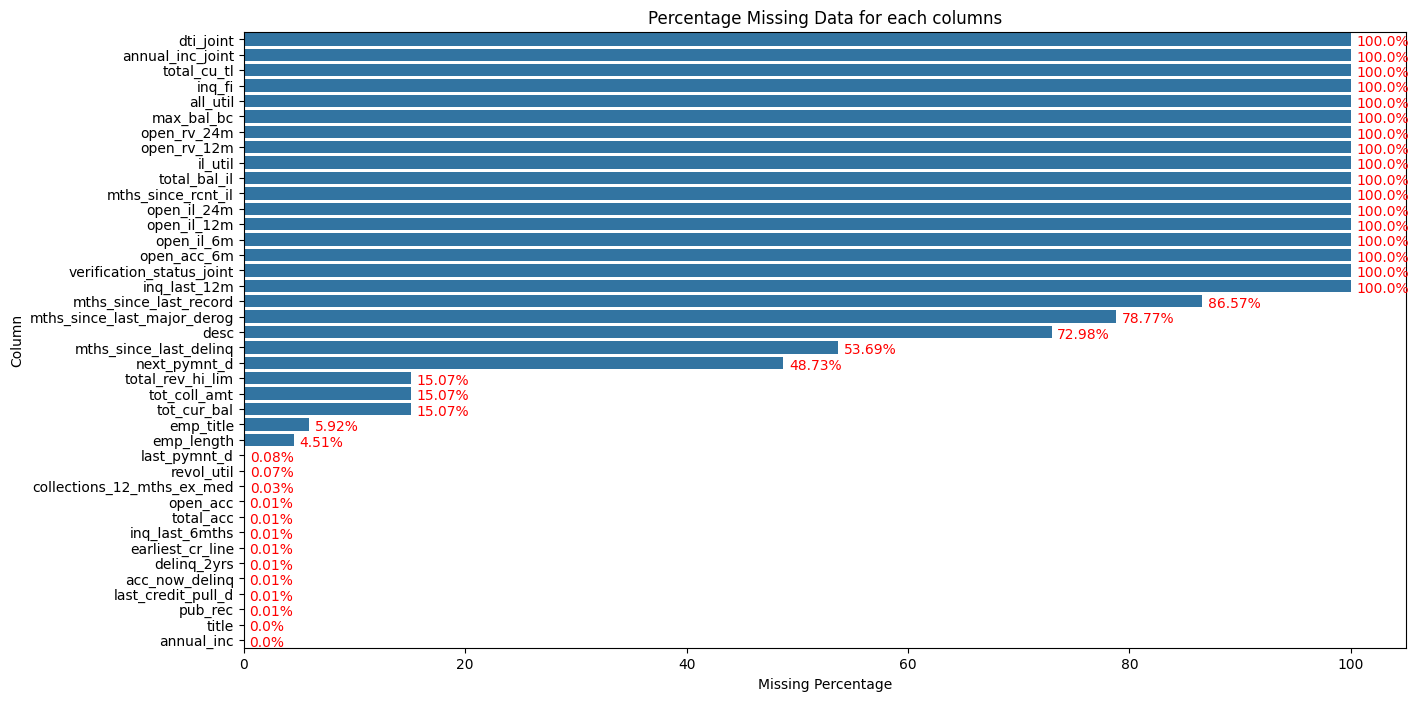

In [50]:
# Calculate the percentage of missing values in each column of dfloan
missing = (dfloan.isnull().sum() / len(dfloan)) * 100

# Filer out the columns that have no missing values
missing = missing[missing > 0]

# Create a DataFrame from the missing data
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing %': np.round(missing.values, 2) # Round the missing percentage to 2 decimal places
}) 

# Sorth the DataFrame by the percentage of missing values in descending order
missing_df = missing_df.sort_values('Missing %', ascending=False)


# Create a bar plot of the missing data
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Missing %', y='Column', data=missing_df)

# Add the percentage of missing data as text on the bars
for i, v in enumerate(missing_df['Missing %']):
    ax.text(v + 0.5, i + .4, str(v) + '%', color='red')

# Set the labels and title of the plot
ax.set_xlabel('Missing Percentage')
ax.set_title('Percentage Missing Data for each columns')

# Display the plot
plt.show()

In [58]:
# Count the number of rows in missing_df where 'Missing %' is greater than 40
len(missing_df[missing_df['Missing %'] > 40])

22

- The data contains a lot of missing values, there's 22 columns that contains missing values more than 40% of the data, for this columns i decided to drop them later because it's too much missing values, and i think it's not valid.

- For the rest of the columns i will consider to fill(impute), drop them after i do furhter analysis on the data.

### Duplicate Values Checking

In [71]:
# print the number of duplicated rows in dfloan
print(dfloan.duplicated().sum())

0


Our data not contains any duplicate values, so we don't need to drop any duplicate values.

### Outlier Checking
This outlier checking it's just a simple checking, because we want to make a scorecard model, outlier can be sensitive to outliers in the data. Outliers can skew the model's parameter estimates, leading to less accurate predictions.

In [3]:
numeric_copy = numeric.copy()
# drop the specified columns from the numeric DataFrame
numeric_dropped = numeric_copy.drop(columns=['id', 'member_id', 'Unnamed: 0', 'policy_code', 'acc_now_delinq', 'collections_12_mths_ex_med'])

# Calculate the percentage of missing values in each column
num_mis = (numeric_dropped.isna().sum() / len(dfloan) * 100)

# filter out the columns that have less than 0.4% missing values
low_missing_num = num_mis[num_mis < 0.4]

numeric_new = numeric_copy.loc[:, low_missing_num.index]
numeric_new

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.64,110000.0,19.85,0.0,2.0,18.0,0.0,23208,77.6,36.0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64
466281,22000,22000,22000.0,19.97,582.50,78000.0,18.45,0.0,5.0,18.0,1.0,18238,46.3,30.0,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50
466282,20700,20700,20700.0,16.99,514.34,46000.0,25.65,0.0,2.0,18.0,0.0,6688,51.1,43.0,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34
466283,2000,2000,2000.0,7.90,62.59,83000.0,5.39,3.0,1.0,21.0,0.0,11404,21.5,27.0,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,1500.68


`delinq_2yrs` -> binning

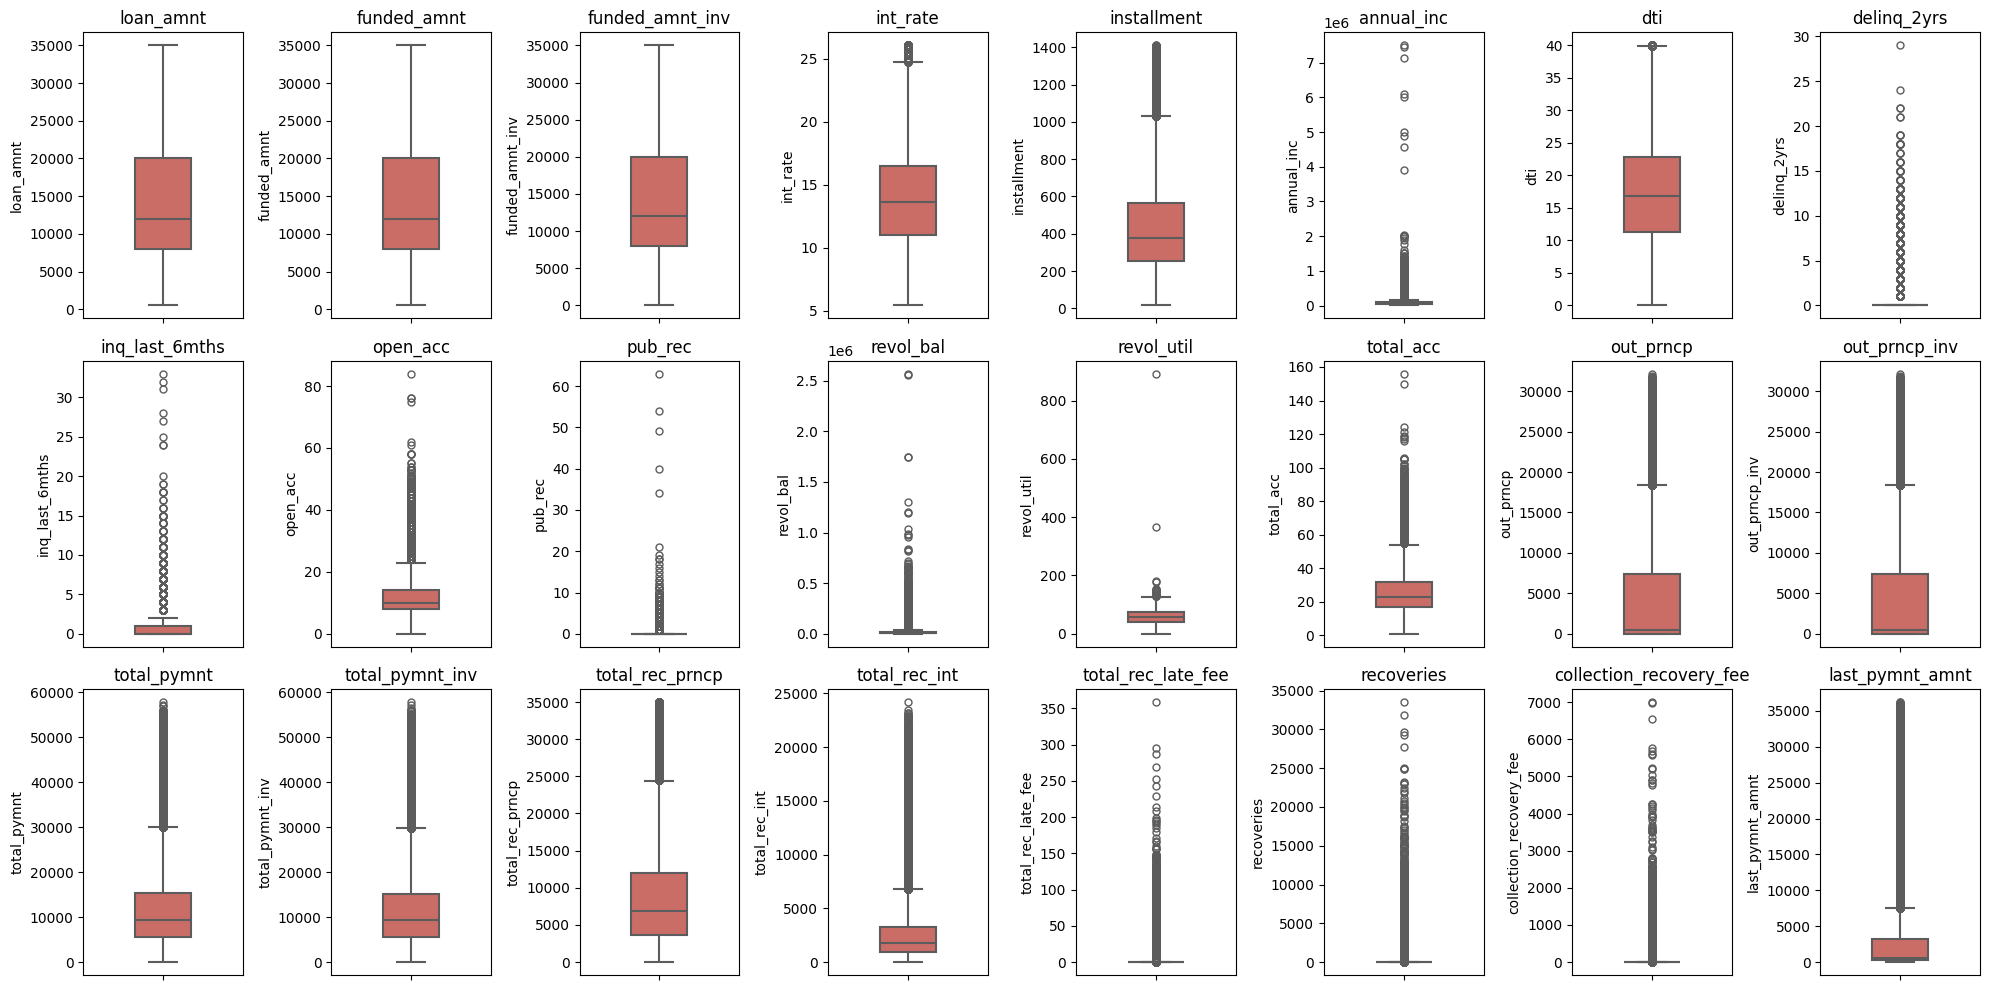

In [22]:
# create boxplot 3x9 grid of the numeric DataFrame
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_new.columns):
    plt.subplot(3, 8, i+1)
    sns.boxplot(numeric[col], palette='hls', width=0.35, linewidth=1.65, fliersize=5)
    plt.title(col)
    plt.tight_layout()

# Display the plot 
plt.show()

From the boxplot above, we can detect that there's some column that contains outliers:
- `annual_inc`
- `delinq_2yrs`
- `inq_last_6mths`
- `open_acc`
- `pub_rec`
- `revol_bal`
- `revol_util`
- `total_acc`
- `total_rec_fee`
- `recoveries`
- `collection_recovery_fee`

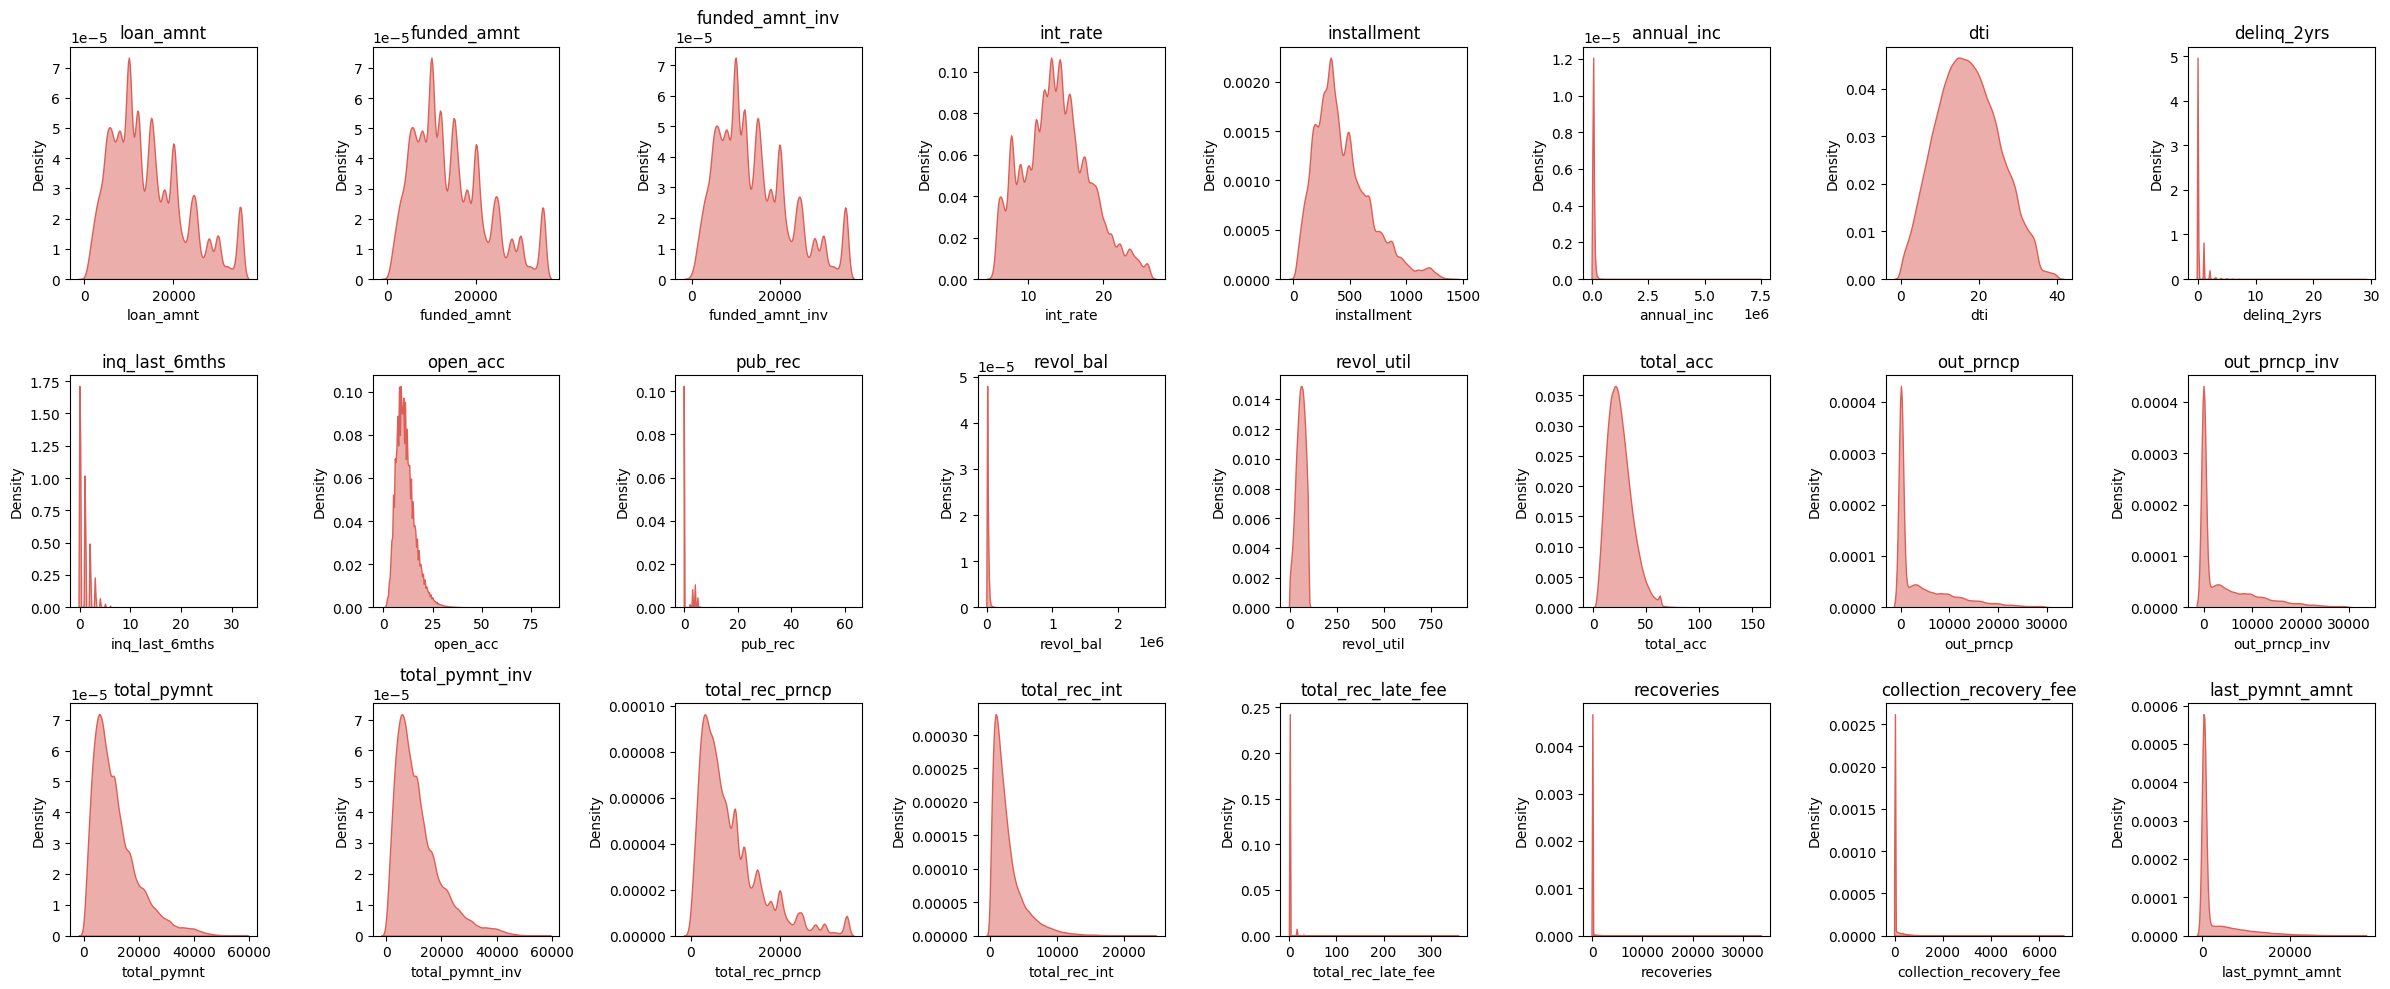

In [39]:
# create kdeplot 3x9 grid of the numeric DataFrame
plt.figure(figsize=(24, 10))
for i, col in enumerate(numeric_new.columns):
    plt.subplot(3, 8, i+1)
    sns.kdeplot(numeric[col], color='#db5f57', shade=True, alpha=0.5)
    plt.title(col)
    plt.tight_layout()

# Display the plot 
plt.show()

most of our numerical data distributios are positively skewed, for columns with <40% missing values, the values will be imputed with median, and for columns with >40% missing values, the columns will be dropped.

In [52]:
# map the loan status to default and not default or not
map_lstatus = {
    'Current': 'Not Default',
    'Fully_paid': 'Not Default',
    'Charged Off': 'Default',
    'Late (31-120 days)': 'Default',
    'In Grace Period': 'Default',
    'Does not meet the credit policy. Status:Fully Paid': 'Not Default',
    'Late (16-30 days)': 'Default',
    'Default': 'Default',
    'Does not meet the credit policy. Status:Charged Off': 'Default'
}
dfloan['loan_status'] = dfloan['loan_status'].map(map_lstatus)

<Axes: xlabel='term', ylabel='count'>

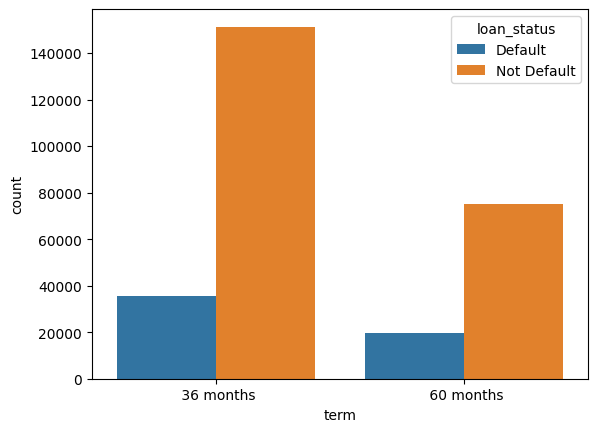

In [53]:
sns.countplot(x='term', data=dfloan, hue='loan_status')

In [51]:
categoric.sample(5)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
294734,36 months,B,B3,Driver,10+ years,MORTGAGE,Not Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,car,Car financing,633xx,MO,Jan-03,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
413336,36 months,B,B2,"Instructor, EMS Program Director",3 years,MORTGAGE,Source Verified,Apr-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,373xx,TN,Jul-02,w,Feb-15,NaN,Feb-15,INDIVIDUAL
238064,36 months,D,D5,RRT,1 year,MORTGAGE,Not Verified,Dec-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,951xx,CA,Nov-01,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
338202,60 months,D,D5,Nurse,4 years,RENT,Source Verified,Jul-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,024xx,MA,Sep-05,w,Sep-15,NaN,Jan-16,INDIVIDUAL
248091,60 months,D,D2,Accounting/HR Manager,4 years,RENT,Source Verified,Nov-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,919xx,CA,Oct-00,w,Jan-16,Feb-16,Jan-16,INDIVIDUAL


## Data Preprocessing